In [82]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 븐류
from sklearn.neighbors import KNeighborsRegressor # 회귀- 예측
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re

matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [83]:
df = pd.read_csv('diabetes.csv')
# 판다스에서 넘파이로 변경하는 법
# np_arr = df.to_numpy()
# np_arr
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [84]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [85]:
df[df['Pregnancies']<5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
758,1,106,76,0,0,37.5,0.197,26,0
760,2,88,58,26,16,28.4,0.766,22,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [86]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [87]:

df[df['SkinThickness']==0].count()

Pregnancies                 227
Glucose                     227
BloodPressure               227
SkinThickness               227
Insulin                     227
BMI                         227
DiabetesPedigreeFunction    227
Age                         227
Outcome                     227
dtype: int64

In [88]:
# df.isnull() null값 확인

In [89]:
# df.Outcome
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


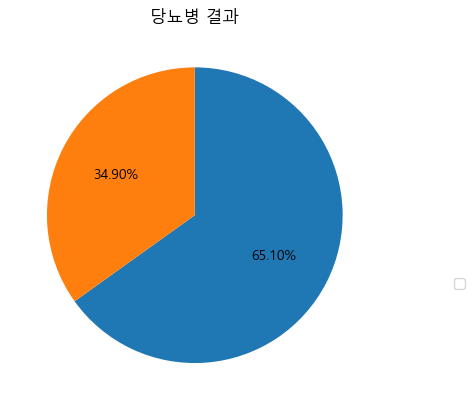

In [90]:
# pie그래프로 출력
labels=['당뇨병 비확인','당뇨병확인']
plt.pie(df['Outcome'].value_counts(),autopct='%.2f%%',startangle=90,counterclock=False)
plt.title("당뇨병 결과")
plt.legend(loc=(1.2,0.3))
plt.show()

In [102]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_3884\1140099962.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


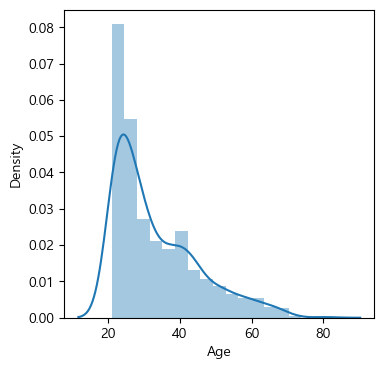

In [97]:
# 각 특성별 그래프를 출력하시오.
import seaborn as sns
fig,axs = plt.subplots(4,2,figsize=(4,4))
# axs[0,0].bar(df['Age'],df.index)
# 다이어그램 x,y축을 넣어서 하는 것이 아니라, x축 데이터만 입력하면 그래프 출력
sns.distplot(df['Age'],axs=[0,0]) 
sns.distplot(df['Pregnancies'],axs=[0,1]) 
sns.distplot(df['Glucose'],axs=[1,0]) 
sns.distplot(df['BloodPressure'],axs=[1,1]) 
sns.distplot(df['SkinThickness'],axs=[2,0]) 
sns.distplot(df['Insulin'],axs=[2,1]) 
sns.distplot(df['BMI'],axs=[3,0]) 
sns.distplot(df['DiabetesPedigreeFunction'],axs=[3,1]) 
plt.show()

In [99]:
df['Age'].sort_values().head(20)

255    21
60     21
102    21
182    21
623    21
624    21
55     21
626    21
627    21
629    21
105    21
413    21
324    21
414    21
220    21
307    21
550    21
422    21
208    21
392    21
Name: Age, dtype: int64